In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

599

In [62]:
City= []
Cloudiness= []
Country= []
Date= []
Humidity= []
lat= []
lng= []
Max_Temp= []
Wind_Speed= []

WeatherPy_df =pd.DataFrame(columns= ["City","Cloudiness", "Country",
                                    "Date", "Lat", "Lng",
                                      "Max Temp", "Wind Speed"])
WeatherPy_df

,City,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind Speed


In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=bab0ce301c736d4083e592382b2b8331&q="
i = 0

print("Beginning Data Revival")
print("------------------------")

for city in cities:    
    city_pd = requests.get(url + city)
    city_data = city_pd.json()

    if (city_data['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        #print(city_data.url)

        WeatherPy_df.loc[i,'City'] = city
        WeatherPy_df.loc[i,'Cloudiness'] = city_data['clouds']['all']
        WeatherPy_df.loc[i,'Country'] = city_data['sys']['country']
        WeatherPy_df.loc[i,'Date'] = city_data["dt"] 
        WeatherPy_df.loc[i,'Humidity'] = city_data['main']['humidity']
        WeatherPy_df.loc[i,'Lat'] = city_data['coord']['lat']
        WeatherPy_df.loc[i,'Lng'] = city_data['coord']['lon']
        WeatherPy_df.loc[i,'Max Temp'] = city_data['main']['temp_max']
        WeatherPy_df.loc[i,'Wind Speed'] = city_data['wind']['speed']
        
# Make an exception incase link is invalid
    else:
        print('City not found. Skipping')
        
# Make a notification to alert the completion of the task        
print("-"*20)
print("Data Retrieval Complete")      
print("-"*20)

Beginning Data Revival
------------------------
Processing Record 1 | hermanus
Processing Record 2 | prince rupert
City not found. Skipping
Processing Record 3 | chuy
Processing Record 4 | bredasdorp
Processing Record 5 | dennery
Processing Record 6 | healdsburg
Processing Record 7 | qaanaaq
City not found. Skipping
Processing Record 8 | rikitea
Processing Record 9 | thompson
Processing Record 10 | severnyy
Processing Record 11 | kloulklubed
Processing Record 12 | pozo colorado
Processing Record 13 | kodiak
City not found. Skipping
Processing Record 14 | mataura
Processing Record 15 | deputatskiy
Processing Record 16 | punta arenas
Processing Record 17 | atuona
Processing Record 18 | cape town
Processing Record 19 | saint-philippe
Processing Record 20 | castro
Processing Record 21 | kanchanaburi
Processing Record 22 | ribeira grande
City not found. Skipping
Processing Record 23 | port alfred
Processing Record 24 | santiago
Processing Record 25 | berlevag
City not found. Skipping
Proces

In [65]:
WeatherPy_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
Humidity      540
dtype: int64

In [66]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

#figure out the max and min
#WeatherPy_df.min()
#WeatherPy_df.max()

,City,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind Speed,Humidity
1,hermanus,85,ZA,1619718071,-34.4187,19.2345,287.04,3.21,78.0
2,prince rupert,90,CA,1619718071,54.3161,-130.32,283.15,8.23,87.0
3,chuy,0,UY,1619718071,-33.6971,-53.4616,294.82,1.68,45.0
4,bredasdorp,100,ZA,1619718072,-34.5322,20.0403,286.15,0.51,82.0
5,dennery,75,LC,1619718072,13.8996,-60.8879,298.15,4.63,83.0
6,healdsburg,40,US,1619718072,38.6105,-122.869,298.15,1.54,67.0
7,qaanaaq,44,GL,1619718073,77.484,-69.3632,269.5,3.79,73.0
8,rikitea,95,PF,1619718073,-23.1203,-134.969,297.57,4.25,71.0
9,thompson,75,CA,1619717945,55.7435,-97.8558,272.15,7.2,51.0
10,severnyy,0,RU,1619718074,50.677,36.5532,286.15,2,30.0


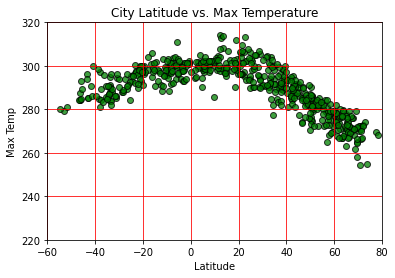

In [74]:
#Latitude Vs Temperature 

# Build Scatter Plot
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Max Temp'], facecolor='green', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(220, 320)
plt.xlim(-60, 80)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="red")
# Show plot
plt.show()


In [ ]:
#Observation As we can see from the scatter plot "City Latitude vs. Max Temperature
#when the latitude increases from -60 to 0, there is a max temperature increase, 
#but when the lattitude increases from 0 to 80, there is a max temperature decrease. 
#In conclusion, the further away the Latitude is from 0/20 then the lower the Max Temperature is, 
#which also means that as the lattitude approaches 0/20, the max temperature increases.

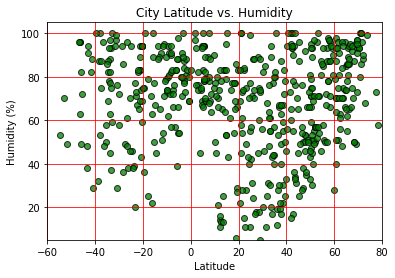

In [77]:
#Humidity Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Humidity'], facecolor='green', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(5, 105)
plt.xlim(-60, 80)
# Set titles
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="red")
# Show plot
plt.show()

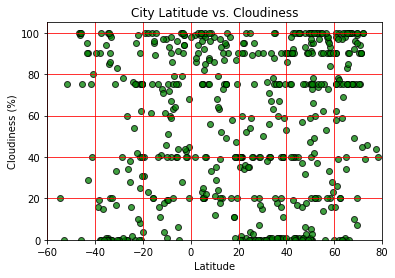

In [80]:
#Cloudiness Vs. Latitude 
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Cloudiness'], facecolor='green', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(0, 105)
plt.xlim(-60, 80)
# Set titles
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="red")
# Show plot
plt.show()

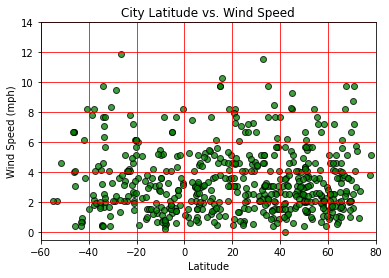

In [82]:
#Wind Speed Vs. Latitude
plt.scatter(WeatherPy_df['Lat'],WeatherPy_df['Wind Speed'], facecolor='green', edgecolors='black', marker="o", alpha=0.75)
# Incorporate other graph properties
plt.ylim(-.5, 14)
plt.xlim(-60, 80)
# Set titles
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="red")
# Show plot
plt.show()

In [ ]:
#Observation As we can see from the scatter plot, "City Latitude vs. Wind Speed, 
#the wind speed looks to be highly concentrated from 0 to 6 mph for most of the City Latitude. 
#However, the wind speed looks to be less concentrated from 10 to 14 mph for most of the City Latitude. 
#This means that wind speed at a lower miles per hour is more consistent 
#than wind speed at a higher miles per hour for most city latitude.


In [92]:

# Create Northern and Southern Hemisphere DataFrames
northern_df = WeatherPy_df.loc[pd.to_numeric(WeatherPy_df["Lat"]).astype(float) > 0, :]
southern_df = WeatherPy_df.loc[pd.to_numeric(WeatherPy_df["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -0.53x + 308.54
The r-squared is: -0.8778885593512549
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


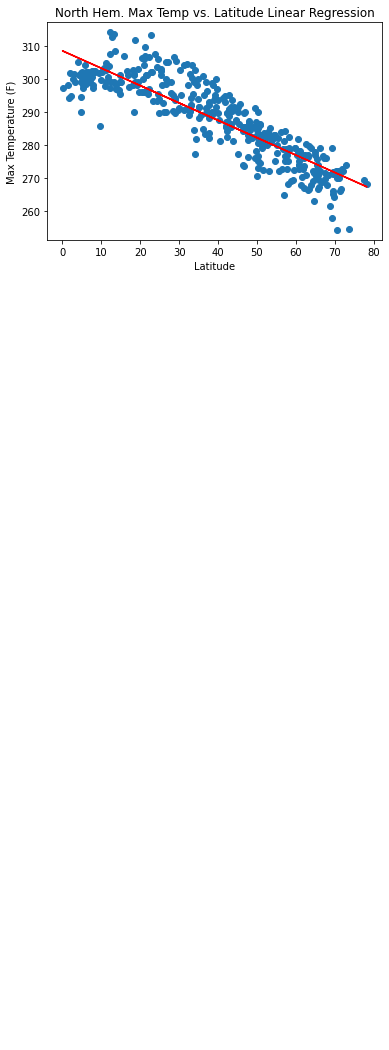

In [102]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=17,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('North Hem. Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.32x + 301.19
The r-squared is: 0.7151982851422527
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


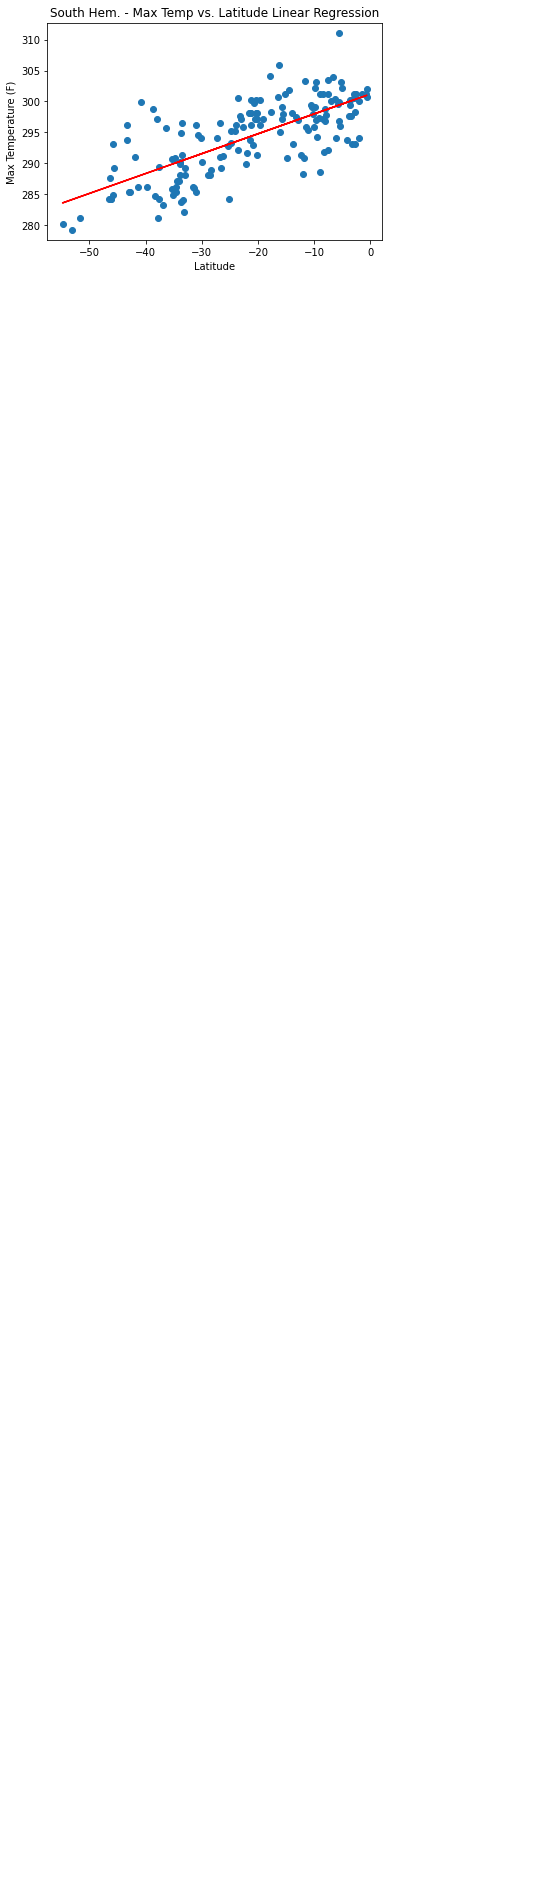

In [107]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('South Hem. - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

Regression line equation is: y = 0.18x + 59.29
The r-squared is: 0.15253687579734035
The regression does not display much of a correlation between the data sets.


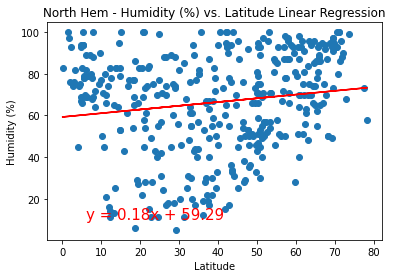

In [111]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('North Hem - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.17x + 77.0
The r-squared is: 0.11621880004465386
not much of a correlation between the data sets.


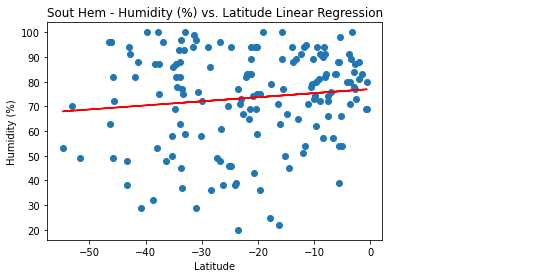

In [115]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Sout Hem - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("not much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.15x + 50.62
The r-squared is: 0.0865411079311917
not much of a correlation between the data sets.


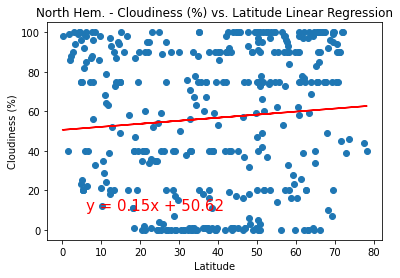

In [120]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('North Hem. - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("not much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.32x + 59.29
The r-squared is: 0.12207108397621569
not much of a correlation between the data sets.


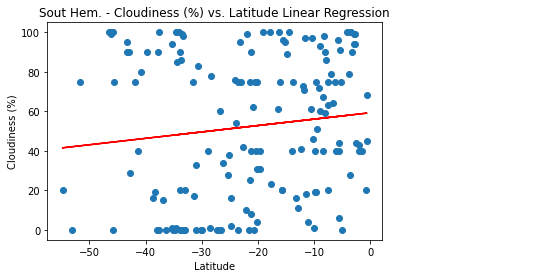

In [119]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Sout Hem. - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("not much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.0x + 3.42
The r-squared is: 0.006661099378802361
not much of a correlation between the data sets.


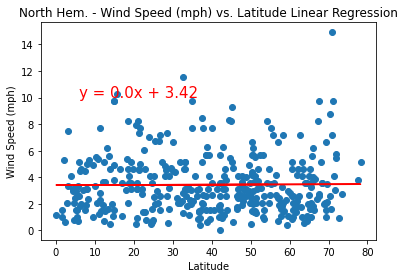

In [122]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('North Hem. - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("not much of a correlation between the data sets.")
plt.show()